In [1]:
import pandas as pd
df = pd.read_csv("/content/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15]}

grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(x_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)

print("Best k =", grid.best_params_['n_neighbors'])

print("R2 Score =", r2_score(y_test, y_pred))

print("RMSE =", np.sqrt(mean_squared_error(y_test, y_pred)))

Best k = 3
R2 Score = 0.7046442656646525
RMSE = 4.6539825286421435


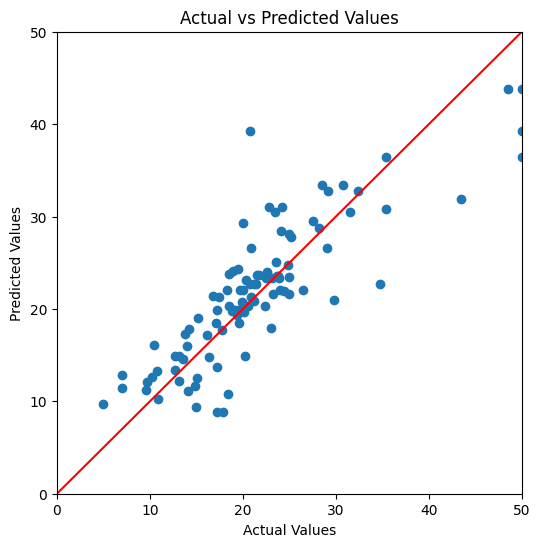

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
max_value=max(y_test.max(),y_pred.max())
plt.plot([0,max_value],[0,max_value],color='red')
plt.xlim([0,max_value])
plt.ylim([0,max_value])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15]}

grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(x_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(x_train)

print("Best k =", grid.best_params_['n_neighbors'])

print("R2 Score =", r2_score(y_train, y_pred))

print("RMSE =", np.sqrt(mean_squared_error(y_train, y_pred)))

Best k = 3
R2 Score = 0.7671599233075376
RMSE = 4.4975115353938895


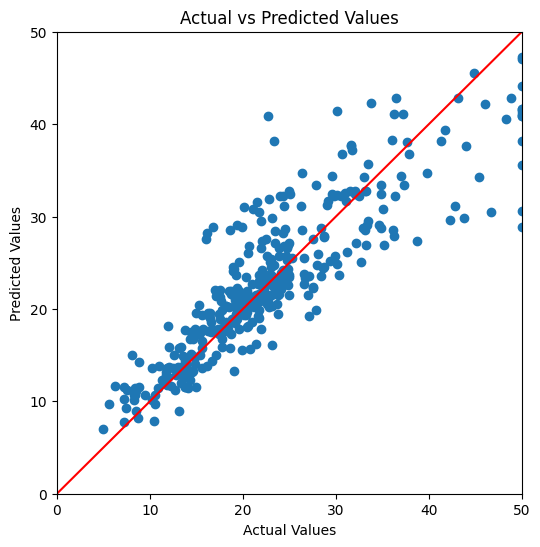

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_train,y_pred)
max_value=max(y_train.max(),y_pred.max())
plt.plot([0,max_value],[0,max_value],color='red')
plt.xlim([0,max_value])
plt.ylim([0,max_value])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()